<a href="https://colab.research.google.com/github/kazuki326/ImageSearch/blob/main/photo_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Colab セル
!pip install -q --upgrade pip            # 念のため
!pip install -q faiss-cpu                # 1.11.0（cp311） が入る


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 58.9 MB/s eta 0:00:00


# **商品一覧ページから画像URLを取得**

In [ ]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

# ベースURLと共通パラメータ
base_url = "https://bier.jp/"
query_params = {
    "q": "catalog",
    "type": "",
    "state": "ドイツ",  # requestsが自動エンコードします
    "flavor": "",
    "text": "",
    "maker": "",
    "sort": "",
    "tags": "",
    "specialprice": "",
    "stock": ""
}

target_prefix = "https://bier.jp/images/beeroriginal/"
exclude_url = "https://bier.jp/images/beeroriginal/no_img.jpg"

all_image_urls = []

# ページ1から14までループして画像URLを取得
for page in range(1, 15):
    query_params["page"] = page
    response = requests.get(base_url, params=query_params)
    if response.status_code != 200:
        print(f"Page {page} の取得に失敗しました。")
        continue

    soup = BeautifulSoup(response.text, "html.parser")
    img_tags = soup.find_all("img")
    for img in img_tags:
        src = img.get("src")
        if src:
            abs_url = urljoin(response.url, src)
            # 指定のプレフィックスで始まり、除外対象でない場合に追加
            if abs_url.startswith(target_prefix) and abs_url != exclude_url:
                all_image_urls.append(abs_url)

# 重複を除去
all_image_urls = list(set(all_image_urls))

# 結果をファイルに保存
with open("image_urls.txt", "w", encoding="utf-8") as f:
    for url in all_image_urls:
        f.write(url + "\n")

print("指定条件の画像URLの保存が完了しました。")

# 先頭10件をターミナルに出力
print("\n先頭10件の画像URL:")
for url in all_image_urls[:10]:
    print(url)


指定条件の画像URLの保存が完了しました。

先頭10件の画像URL:
https://bier.jp/images/beeroriginal/sx-162.jpg
https://bier.jp/images/beeroriginal/ax-979.jpg
https://bier.jp/images/beeroriginal/cx-302.jpg
https://bier.jp/images/beeroriginal/dx-115.jpg
https://bier.jp/images/beeroriginal/ax-831.jpg
https://bier.jp/images/beeroriginal/sx-163.jpg
https://bier.jp/images/beeroriginal/cx-410.jpg
https://bier.jp/images/beeroriginal/dx-202.jpg
https://bier.jp/images/beeroriginal/zx-012.jpg
https://bier.jp/images/beeroriginal/cx-340.jpg


## 【1】商品名も取得

In [ ]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

# ベースURLと共通パラメータ
base_url = "https://bier.jp/"
query_params = {
    "q": "catalog",
    "type": "",
    "state": "ドイツ",  # requestsが自動エンコードします
    "flavor": "",
    "text": "",
    "maker": "",
    "sort": "",
    "tags": "",
    "specialprice": "",
    "stock": ""
}

target_prefix = "https://bier.jp/images/beeroriginal/"
exclude_url = "https://bier.jp/images/beeroriginal/no_img.jpg"

# 商品名と画像URLを結びつけた辞書
product_images = {}

# ページ1から14までループして画像URLと商品名を取得
for page in range(1, 15):
    query_params["page"] = page
    response = requests.get(base_url, params=query_params)
    if response.status_code != 200:
        print(f"Page {page} の取得に失敗しました。")
        continue

    soup = BeautifulSoup(response.text, "html.parser")

    # imgタグをすべて取得し、条件に沿ったものから画像URLと商品名を取得
    img_tags = soup.find_all("img")
    for img in img_tags:
        src = img.get("src")
        if src:
            abs_url = urljoin(response.url, src)
            # 指定のプレフィックスで始まり、除外対象でない場合に処理
            if abs_url.startswith(target_prefix) and abs_url != exclude_url:
                # 商品名は alt 属性から取得（ページによっては別の取得方法が必要な場合もあります）
                product_name = img.get("alt")
                if not product_name:
                    product_name = "不明な商品"  # alt属性がない場合のフォールバック
                # 同じ商品名が存在する場合、リストに追加するなどの対処も可能です。ここでは上書きになります。
                product_images[product_name] = abs_url

# 結果をファイルに保存
with open("product_images.txt", "w", encoding="utf-8") as f:
    for product, img_url in product_images.items():
        f.write(f"{product}: {img_url}\n")

print("商品名と画像URLの保存が完了しました。")

# 先頭10件をターミナルに出力
print("\n先頭10件の商品名と画像URL:")
count = 0
for product, img_url in product_images.items():
    print(f"{product}: {img_url}")
    count += 1
    if count >= 10:
        break

商品名と画像URLの保存が完了しました。

先頭10件の商品名と画像URL:
【誕生日・ギフトに】HERTLギフトセット（白箱入り）: https://bier.jp/images/beeroriginal/sx-162.jpg
猫の8本セット: https://bier.jp/images/beeroriginal/sx-163.jpg
【※バラ売り】パウラナー・オクトーバーフェストビア【2024】: https://bier.jp/images/beeroriginal/fx-006.jpg
【季節限定】シュナイダー・ホッペンヴァイセ TAP5: https://bier.jp/images/beeroriginal/cx-308.jpg
【誕生日・ギフトに】ドイツビールギフト8本セット（白箱入り）: https://bier.jp/images/beeroriginal/sx-155f.jpg
【誕生日・ギフトに】ドイツビールギフト8本セットpart2（白箱入り）: https://bier.jp/images/beeroriginal/sx-156.jpg
【※バラ売り】シュネーオイレ マルレーネ: https://bier.jp/images/beeroriginal/hx-201.jpg
【※バラ売り】リッターグーツ ゴーゼ: https://bier.jp/images/beeroriginal/hx-030.jpg
【※バラ売り】ローター ヴィンツァーグリューヴァイン: https://bier.jp/images/beeroriginal/dx-202.jpg
【※バラ売り】レーベンフォイアー グリューヴァイン: https://bier.jp/images/beeroriginal/dx-203.jpg


## 【2】取得した情報をDB上に保存

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Colab 1セルで動く：DB構築＋スクレイピング登録
import os
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin, urlparse
import sqlite3
import json
from google.colab import drive

# ───────────────────────────────────────────
# 1) Driveマウント & フォルダ準備
# ───────────────────────────────────────────
drive.mount('/content/drive', force_remount=True)
DB_PATH = "/content/drive/MyDrive/bier_catalog.db"
IMG_DIR = "/content/drive/MyDrive/beer_images"
os.makedirs(IMG_DIR, exist_ok=True)

# ───────────────────────────────────────────
# 2) JSON取得ヘルパー
# ───────────────────────────────────────────
def fetch_product_data(item_id: str) -> dict | None:
    item_id = item_id.replace("-", "")
    url = f"https://bier.jp/index.cgi?t=itemdetail&id={item_id}&output=json"
    try:
        resp = requests.get(url, timeout=5)
        resp.raise_for_status()
        return resp.json()
    except requests.RequestException:
        return None

# ───────────────────────────────────────────
# 3) DB初期化：必要なカラムをすべて用意
# ───────────────────────────────────────────
def init_db(path=DB_PATH):
    with sqlite3.connect(path) as conn:
        cur = conn.cursor()
        cur.execute("DROP TABLE IF EXISTS beers")
        cur.execute("""
        CREATE TABLE beers (
            id            INTEGER PRIMARY KEY AUTOINCREMENT,
            name          TEXT    NOT NULL,
            img_filename  TEXT    NOT NULL,
            item_id       TEXT    NOT NULL,
            german_name   TEXT,
            maker         TEXT,
            volume_ml     INTEGER,
            price_yen     TEXT,
            category      TEXT,
            availability  TEXT,
            description   TEXT,
            json_data     TEXT
        )
        """)
        conn.commit()

# ───────────────────────────────────────────
# 4) 画像ダウンロード ＆ DB登録
# ───────────────────────────────────────────
def download_and_insert(product_dict, db_path=DB_PATH, img_dir=IMG_DIR):
    with sqlite3.connect(db_path) as conn:
        cur = conn.cursor()
        for idx, (name, url) in enumerate(product_dict.items(), start=1):
            # ファイル名・item_id の準備
            parsed = urlparse(url)
            base   = os.path.basename(parsed.path)
            item_id, ext = os.path.splitext(base)
            item_id = item_id.replace("-", "")  # API がハイフン抜きIDを期待する場合
            ext = ext.lower() if ext.lower() in ('.jpg','.jpeg','.png') else '.jpg'
            fname = f"{idx:04d}{ext}"
            fpath = os.path.join(img_dir, fname)

            # 画像ダウンロード
            if not os.path.exists(fpath):
                r = requests.get(url, timeout=10)
                if r.ok:
                    with open(fpath, "wb") as f:
                        f.write(r.content)
                else:
                    continue

            # JSON取得 & 各フィールド抽出
            jd = fetch_product_data(item_id)
            data = jd.get("data", {}) if jd else {}
            german_name  = data.get("GermanName")
            maker        = data.get("Maker") or data.get("Brewery")
            volume_ml    = int(data.get("Volume")) if data.get("Volume") and data.get("Volume").isdigit() else None
            price_yen    = data.get("Price")
            category     = data.get("Category")
            availability = data.get("Availability")
            description  = data.get("Description")
            json_text    = json.dumps(jd, ensure_ascii=False) if jd else None

            # DB挿入
            cur.execute("""
            INSERT INTO beers
              (name, img_filename, item_id, german_name,
               maker, volume_ml, price_yen, category,
               availability, description, json_data)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
            """, (
              name, fname, item_id, german_name,
              maker, volume_ml, price_yen, category,
              availability, description, json_text
            ))
        conn.commit()

# ───────────────────────────────────────────
# 5) スクレイピング
# ───────────────────────────────────────────
base_url = "https://bier.jp/"
query_params = {
    "q": "catalog", "type": "", "state": "ドイツ",
    "flavor": "", "text": "", "maker": "",
    "sort": "", "tags": "", "specialprice": "", "stock": ""
}
target_prefix = "https://bier.jp/images/beeroriginal/"
exclude_url  = "https://bier.jp/images/beeroriginal/no_img.jpg"

product_images = {}
for page in range(1, 15):
    query_params["page"] = page
    resp = requests.get(base_url, params=query_params)
    if not resp.ok:
        continue
    soup = BeautifulSoup(resp.text, "html.parser")
    for img in soup.find_all("img", src=True):
        abs_url = urljoin(resp.url, img['src'])
        if abs_url.startswith(target_prefix) and abs_url != exclude_url:
            name = img.get("alt") or "不明な商品"
            product_images[name] = abs_url

print(f"取得した商品数: {len(product_images)}")

# ───────────────────────────────────────────
# 6) 実行：DB初期化＆登録
# ───────────────────────────────────────────
init_db()
download_and_insert(product_images)
print("✅ DB構築（全フィールド付き）が完了しました。")

# ───────────────────────────────────────────
# 7) 動作確認
# ───────────────────────────────────────────
with sqlite3.connect(DB_PATH) as conn:
    for row in conn.execute("""
      SELECT id, name, german_name, maker, volume_ml, price_yen
      FROM beers LIMIT 5
    """):
        print(row)


Mounted at /content/drive
取得した商品数: 260
✅ DB構築（全フィールド付き）が完了しました。
(1, '【誕生日・ギフトに】HERTLギフトセット（白箱入り）', 'HERTL Giftset ', None, 0, '￥4,500')
(2, '猫の8本セット', 'De Poes Giftset ', 'デポーシ', 0, '￥4,980')
(3, '【予約受付中】パウラナー・オクトーバーフェストビア【2025】(9月下旬以降入荷予定)', 'Paulaner Oktoberfestbier 2025 (pre-order: Oct)', 'パウラナー', 500, '￥12,700')
(4, '【予約受付中】ホフブロイ・オクトーバーフェストビア【2025】(9月下旬以降入荷予定)', 'Hofbräu Oktoberfestbier 2025 (pre-order: Oct)', '\tホフブロイ・ミュンヘン', 500, '￥13,400')
(5, '【※バラ売り】パウラナー・オクトーバーフェストビア【2025】', 'Paulaner Oktoberfestbier 2025 (pre-order: Oct)', 'パウラナー', 500, '￥12,700')


### DB上のデータを確認

In [ ]:
#@title ビール情報取得セル
import sqlite3, pandas as pd, json

# ① ここだけ書き換えればOK
beer_id = 89  #@param {type:"integer"}

# ② DB から該当行を取得
with sqlite3.connect(DB_PATH) as conn:
    df = pd.read_sql_query(
        "SELECT * FROM beers WHERE id = ?",
        conn, params=(beer_id,), index_col="id"
    )

if df.empty:
    print(f"⚠️ id={beer_id} の商品は存在しません。")
else:
    row  = df.loc[beer_id]
    data = json.loads(row["json_data"] or "{}").get("data", {})

    # ③ 表示
    print(f"ID           : {beer_id}")
    print(f"Name         : {row['name']}")
    print(f"German Name  : {row['german_name']}")
    print(f"Maker        : {data.get('Maker') or data.get('Brewery')}")
    print(f"Category     : {data.get('Category')}")
    print(f"Volume       : {data.get('Volume')} ml")
    print(f"Price        : {data.get('Price')}")
    print(f"Availability : {data.get('Availability')}")
    print(f"JAN Code     : {data.get('JANCode')}")
    print(f"Image File   : {row['img_filename']}")
    print(f"Item ID      : {row['item_id']}")
    print("\n--- Description ---")
    print(data.get('Description', '')[:200] + "…")  # 先頭200文字だけ


ID           : 89
Name         : ヴァイエンシュテファン ヘフェヴァイスビア l]
German Name  : Weihenstephaner Hefe Weißbier (330ml)
Maker        : ヴァイエンシュテファン
Category     : ヴァイツェン
Volume       : 330 ml
Price        : ￥13,020
Availability : yellow
JAN Code     : 4105120003910
Image File   : 0089.jpg
Item ID      : nx003

--- Description ---
バナナとクローブのフルーティーさとモルトの風味が融合し、軽やかでクリーミーな一杯に仕上がっています。<br>その自然な濁りと淡い琥珀色は、視覚からも楽しむことができます。<br>豊かな白い泡が立ち上る際に放つ魅力的な香りが特徴です。<br>

<br>

<br><b>※こちらは「330ml」専用ページとなります。</b>
<br>　「500ml」専用ページは→
「<a href="h…


## 【3】商品データベースを利用して画像検索アルゴリズムを構築

In [ ]:
!pip install faiss

ERROR: Could not find a version that satisfies the requirement faiss (from versions: none)
ERROR: No matching distribution found for faiss


In [ ]:
# Colab で必要なライブラリをインストール
!pip install faiss-cpu torch torchvision --quiet

from google.colab import files, drive
import os, glob, sqlite3, requests
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as T
import faiss
from PIL import Image
from urllib.parse import urlparse
import numpy as np


# —————— 設定 ——————
drive.mount('/content/drive', force_remount=True)
DB_PATH = "/content/drive/MyDrive/bier_catalog.db"
IMG_DIR = "/content/drive/MyDrive/beer_images"
DEVICE  = "cuda" if torch.cuda.is_available() else "cpu"


# —————— 特徴抽出モデルの準備 ——————
# ResNet50 の最後の全結合層を削除して埋め込みを得る
model = models.resnet50(pretrained=True)
model.fc = nn.Identity()
model = model.to(DEVICE).eval()

# 前処理：リサイズ＋CenterCrop＋ToTensor＋正規化
transform = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225]),
])

def extract_feature(img_path: str) -> torch.Tensor:
    img = Image.open(img_path).convert("RGB")
    x   = transform(img).unsqueeze(0).to(DEVICE)
    with torch.no_grad():
        feat = model(x)  # (1, 2048)
    return feat.cpu().numpy()

# —————— データベース画像の特徴量を一括抽出＆FAISSインデックス構築 ——————
def build_faiss_index(img_dir: str):
    paths = sorted(glob.glob(os.path.join(img_dir, "*")))
    feats = []
    for p in paths:
        feats.append(extract_feature(p))
    feats = np.vstack(feats).astype('float32')  # shape=(N,2048)

    dim   = feats.shape[1]
    index = faiss.IndexFlatL2(dim)
    index.add(feats)  # 登録
    return index, paths

# 一度だけ実行してインデックス作成（キャッシュ推奨）
index, db_paths = build_faiss_index(IMG_DIR)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 866.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.0 MB/s eta 0:00:00


ValueError: mount failed

Mounted at /content/drive
最良一致: /content/drive/MyDrive/beer_images/0089.jpg (距離 188.61)


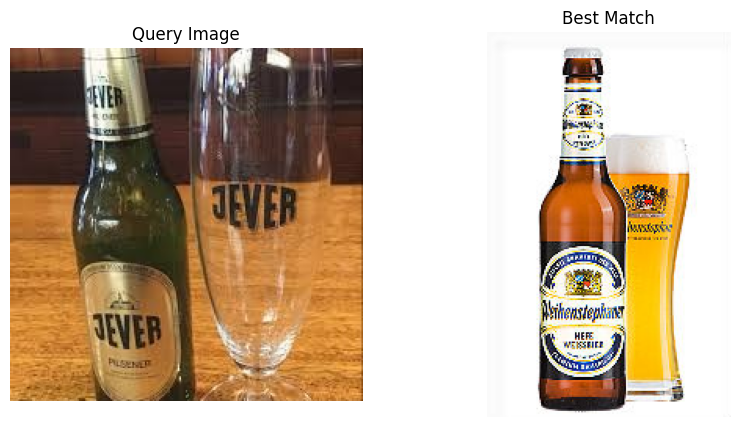

商品リンク: https://bier.jp/itemdetail/nx003
=== ビール基本情報 ===
容量       : 330
説明       : バナナとクローブのフルーティーさとモルトの風味が融合し、軽やかでクリーミーな一杯に仕上がっています。<br>その自然な濁りと淡い琥珀色は、視覚からも楽しむことができます。<br>豊かな白い泡が立ち上る際に放つ魅力的な香りが特徴です。<br>

<br>

<br><b>※こちらは「330ml」専用ページとなります。</b>
<br>　「500ml」専用ページは→
「<a href="https://bier.jp/itemdetail/Nx002">こちら</a>」となります。<br>
<br><b>※画像はイメージとなり、グラスは付きません。</b><br>
価格       : ￥11,658


In [ ]:
from google.colab import drive
import os, sqlite3, requests, cv2, numpy as np
import torch, torch.nn as nn
import torchvision.models as models
import torchvision.transforms as T
import faiss
from PIL import Image
from urllib.parse import urlparse
import matplotlib.pyplot as plt

# — Drive マウント & 定数 —
drive.mount('/content/drive', force_remount=True)
DB_PATH  = "/content/drive/MyDrive/bier_catalog.db"
IMG_DIR  = "/content/drive/MyDrive/beer_images"
os.makedirs(IMG_DIR, exist_ok=True)

# — 画像 URL から取得して保存するヘルパー —
def fetch_image_from_url(url: str, save_path: str = "/content/query.jpg") -> str:
    """
    URL の画像をダウンロードして save_path に保存し、パスを返す。
    """
    resp = requests.get(url, timeout=10)
    resp.raise_for_status()
    arr = np.frombuffer(resp.content, np.uint8)
    img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
    if img is None:
        raise RuntimeError("画像の取得に失敗しました。")
    cv2.imwrite(save_path, img)
    return save_path

# — FAISS による最良マッチ検索 —
def find_best_match_faiss(query_path: str, index, db_paths):
    qf = extract_feature(query_path).astype('float32')
    D, I = index.search(qf, k=1)
    best_idx = int(I[0][0])
    print(f"最良一致: {db_paths[best_idx]} (距離 {D[0][0]:.2f})")
    return db_paths[best_idx]

# — bier.jp API 呼び出し —
def fetch_product_data(product_id: str) -> dict:
    url = f"https://bier.jp/index.cgi?t=itemdetail&id={product_id}&output=json"
    r   = requests.get(url, timeout=10); r.raise_for_status()
    data = r.json().get("data", {})
    return {
        "Volume":      data.get("Volume"),
        "Description": data.get("Description"),
        "Price":       data.get("Price"),
    }

# — 全体の流れ —
def main():
    # 1. 画像 URL を指定してローカルに保存
    image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSR1Mwy6T7cDtegotvoOOFhphCfO0SzcoAB9A&s"
    query_path = fetch_image_from_url(image_url)

    # 2. FAISS で最良マッチ検索
    best_path = find_best_match_faiss(query_path, index, db_paths)

    # 3. 元画像とマッチ画像を並べて表示
    query_img = Image.open(query_path).convert("RGB")
    match_img = Image.open(best_path).convert("RGB")
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    for ax, img, title in zip(axes, (query_img, match_img), ("Query Image","Best Match")):
        ax.imshow(img)
        ax.set_title(title)
        ax.axis("off")
    plt.show()

    # 4. DB から item_id を取得し、ハイフン削除
    matched_fn = os.path.basename(best_path)
    conn = sqlite3.connect(DB_PATH); cur = conn.cursor()
    cur.execute("SELECT item_id FROM beers WHERE img_filename = ?", (matched_fn,))
    row = cur.fetchone(); conn.close()
    if not row:
        print("該当レコードなし"); return

    raw_id  = row[0]
    item_id = raw_id.replace("-", "")

    # 5. 商品リンク & API 取得
    link = f"https://bier.jp/itemdetail/{item_id}"
    print("商品リンク:", link)
    info = fetch_product_data(item_id)
    if info:
        print("=== ビール基本情報 ===")
        print("容量       :", info["Volume"])
        print("説明       :", info["Description"])
        print("価格       :", info["Price"])
    else:
        print("基本情報取得失敗")

if __name__ == "__main__":
    main()


# 【A】OCRを用いて瓶の銘柄を特定

In [ ]:
!pip install easyocr

Mounted at /content/drive
=== OCR 検出文字列 ===
・TVER
・TEVER
・JEVER '


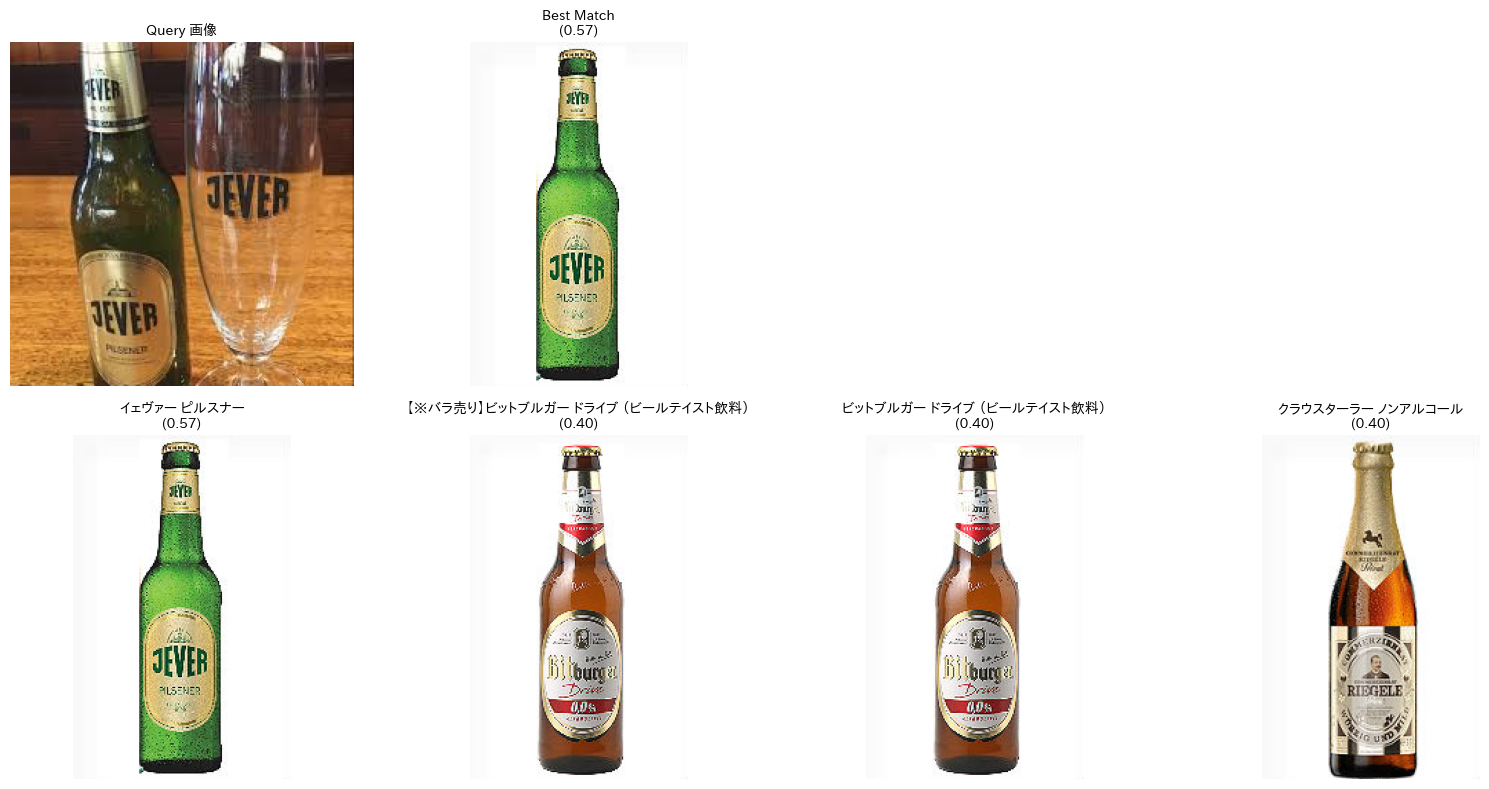

In [ ]:
import sqlite3, json, requests, cv2, numpy as np, easyocr
from difflib import SequenceMatcher
import matplotlib.pyplot as plt
from matplotlib import font_manager, gridspec
from PIL import Image
from io import BytesIO
import os

# — 定数・フォント設定 —
DB_PATH  = "/content/drive/MyDrive/bier_catalog.db"
IMG_DIR   = "/content/drive/MyDrive/beer_images"
IPA_FONT  = "/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf"
font_prop = font_manager.FontProperties(fname=IPA_FONT)

# — Drive マウント & OCRリーダー初期化 —
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
reader = easyocr.Reader(['en'], gpu=False)

def ocr_texts_from_url(url: str) -> list[str]:
    resp = requests.get(url, timeout=10)
    img  = cv2.imdecode(np.frombuffer(resp.content, np.uint8), cv2.IMREAD_COLOR)
    if img is None:
        raise RuntimeError("画像の読み込みに失敗しました。")
    return [text for (_, text, _) in reader.readtext(img)]

def find_related_beers(url: str, top_n: int = 5):
    # 1) OCR
    texts = ocr_texts_from_url(url)
    # --- ここで検出結果を出力 ---
    if texts:
        print("=== OCR 検出文字列 ===")
        for txt in texts:
            print(f"・{txt}")
    else:
        print("OCR でテキストが検出できませんでした。")
        return

    # 2) DB 取得
    conn = sqlite3.connect(DB_PATH); cur = conn.cursor()
    cur.execute("SELECT id, name, img_filename, json_data FROM beers")
    rows = cur.fetchall()
    conn.close()

    # 3) 類似度スコア計算
    candidates = []
    for db_id, name, img_fn, json_text in rows:
        try:
            german = json.loads(json_text).get("data", {}).get("GermanName", "") or ""
        except:
            german = ""
        if not german:
            continue
        score = max(SequenceMatcher(None, t.lower(), german.lower()).ratio()
                    for t in texts)
        candidates.append((score, name, img_fn))
    candidates.sort(key=lambda x: x[0], reverse=True)
    top = candidates[:top_n]

    # 4) 画像読み込み
    # Query
    resp = requests.get(url, timeout=10)
    query_img = Image.open(BytesIO(resp.content)).convert("RGB")
    # Best match
    best_img = Image.open(os.path.join(IMG_DIR, top[0][2])).convert("RGB")

    # 5) グリッド作成
    second_cols = max(1, len(top) - 1)
    cols = max(2, second_cols)
    fig = plt.figure(figsize=(4*cols, 8))
    gs = gridspec.GridSpec(2, cols, height_ratios=[1, 1])

    # -- 1行目: Query & Best --
    ax0 = fig.add_subplot(gs[0, 0])
    ax0.imshow(query_img)
    ax0.set_title("Query 画像", fontproperties=font_prop)
    ax0.axis("off")

    ax1 = fig.add_subplot(gs[0, 1])
    ax1.imshow(best_img)
    ax1.set_title(f"Best Match\n({top[0][0]:.2f})", fontproperties=font_prop)
    ax1.axis("off")

    # -- 2行目: 2〜top_n 位 --
    for idx, (score, name, img_fn) in enumerate(top[1:], start=0):
        ax = fig.add_subplot(gs[1, idx])
        path = os.path.join(IMG_DIR, img_fn)
        if os.path.exists(path):
            img = Image.open(path).convert("RGB")
            ax.imshow(img)
        else:
            ax.text(0.5, 0.5, "Not found", ha='center', va='center', fontproperties=font_prop)
        ax.set_title(f"{name}\n({score:.2f})", fontproperties=font_prop, fontsize=10)
        ax.axis("off")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    test_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSR1Mwy6T7cDtegotvoOOFhphCfO0SzcoAB9A&s"
    find_related_beers(test_url, top_n=5)


# 【B】AIを用いたマルチモーダル検索

In [ ]:
#@title Install dependencies
!pip -q install hnswlib pillow torchvision transformers matplotlib sqlalchemy pandas tqdm easyocr rapidfuzz


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 59.0 MB/s et

In [2]:
#@title Mount Drive & set Japanese font
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os, subprocess, matplotlib
from matplotlib import font_manager

IPA_FONT = "/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf"
if not os.path.exists(IPA_FONT):
    subprocess.run(["apt-get", "-yqq", "update"])
    subprocess.run(["apt-get", "-yqq", "install", "fonts-ipafont-gothic"])

if not os.path.exists(IPA_FONT):
    IPA_FONT = "/usr/share/fonts/truetype/noto/NotoSansCJK-Regular.ttc"

font_prop = font_manager.FontProperties(fname=IPA_FONT)
matplotlib.rcParams["font.family"] = font_prop.get_name()

# --- パス定義 ---
DB_PATH   = "/content/drive/MyDrive/bier_catalog.db"
IMG_DIR   = "/content/drive/MyDrive/beer_images"
INDEX_PATH = "/content/drive/MyDrive/beer_index.hnsw"
DIM = 512   # CLIP ViT-B/32
print("Font set to:", font_prop.get_name())

ValueError: mount failed

260 products loaded
Loaded index with 260 vectors


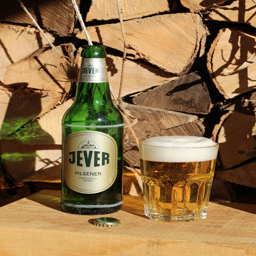


=== Top-5 Candidates ===
[1] 【※バラ売り】イェヴァー ピルスナー / イェヴァー (330) ¥￥8,363  score=0.809
[2] イェヴァー ピルスナー / イェヴァー (330) ¥￥8,363  score=0.809
[3] 【※バラ売り】エルディンガー ウアヴァイセl] / エルディンガー (500) ¥￥6,810  score=0.772
[4] エルディンガー ウアヴァイセl] / エルディンガー (500) ¥￥6,810  score=0.772
[5] 【予約受付中】ホフブロイ オリジナル (5月下旬入荷予定) / ホフブロイ・ミュンヘン (330) ¥￥12,192  score=0.761


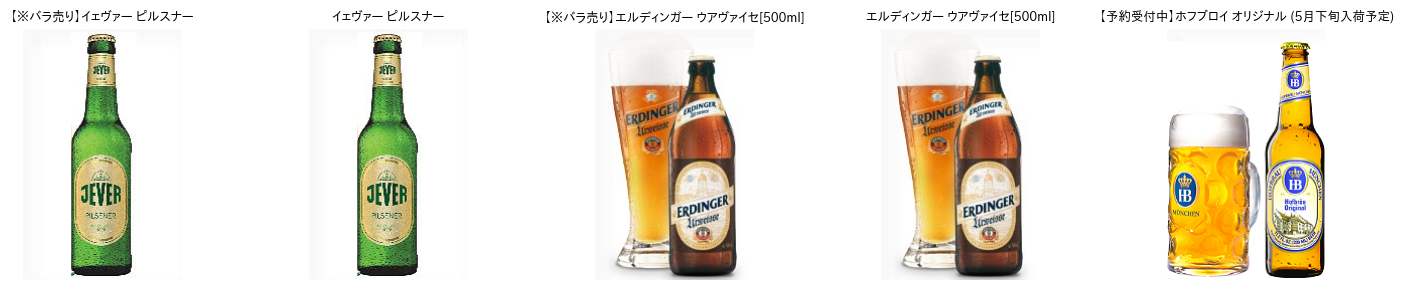

In [ ]:
#@title main (画像類似度のみ)
import logging
# matplotlib.font_manager からの WARNING を全部無視
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

import pandas as pd, sqlite3, json

with sqlite3.connect(DB_PATH) as conn:
    df_raw = pd.read_sql_query("SELECT * FROM beers", conn)

def parse_json(row):
    data = {}
    if row["json_data"]:
        try:
            data = json.loads(row["json_data"]).get("data", {})
        except json.JSONDecodeError:
            pass
    row["volume_ml"] = data.get("Volume")          # 例: '500ml'
    row["price_yen"] = data.get("Price")           # 例: '¥980'
    row["brewery"]   = data.get("Maker") or data.get("Brewery")
    return row

df_meta = df_raw.apply(parse_json, axis=1) \
                .set_index("id")[["name", "brewery",
                                   "volume_ml", "price_yen",
                                   "img_filename"]]

print(f"{len(df_meta):,} products loaded")
df_meta.head()


#@title Build or load hnsw index
import hnswlib, numpy as np, tqdm
from PIL import Image
import torch
from transformers import CLIPProcessor, CLIPModel

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
proc   = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
clip   = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(DEVICE).eval()

@torch.no_grad()
def embed_image(img):
    vec = clip.get_image_features(**proc(images=img, return_tensors="pt").to(DEVICE))
    vec = vec / vec.norm(dim=-1, keepdim=True)
    return vec.cpu().numpy().astype("float32")[0]

index = hnswlib.Index(space='cosine', dim=DIM)

if os.path.exists(INDEX_PATH):
    index.load_index(INDEX_PATH)
    print(f"Loaded index with {index.get_current_count():,} vectors")
else:
    vecs, ids = [], []
    for db_id, meta in tqdm.tqdm(df_meta.iterrows(), total=len(df_meta)):
        path = os.path.join(IMG_DIR, meta["img_filename"])
        if not os.path.exists(path):
            continue
        vecs.append(embed_image(Image.open(path).convert("RGB")))
        ids.append(int(db_id))          # beers.id は整数（AUTO INCREMENT）
    vecs = np.vstack(vecs)
    index.init_index(max_elements=len(vecs), ef_construction=200, M=16)
    index.add_items(vecs, ids)
    index.save_index(INDEX_PATH)
    print(f"Built & saved index: {len(vecs):,} vectors")

index.set_ef(64)   # 検索精度≒Recall


#@title Search similar beers from an image URL (fixed)
import requests, io
from IPython.display import display
from PIL import Image

# 画像 URL を入力
image_url = "https://i.redd.it/tmcivgrbawq51.jpg"  #@param {type:"string"}

# ① 画像を取得
resp = requests.get(image_url, timeout=10)
resp.raise_for_status()
query_img = Image.open(io.BytesIO(resp.content)).convert("RGB")
display(query_img.resize((256, 256)))

# ② ベクトル化 → 最近傍検索
labels, dists = index.knn_query(embed_image(query_img), k=5)  # ← 戻り値の順番

print("\n=== Top-5 Candidates ===")
for rank, (bid, dist) in enumerate(zip(labels[0], dists[0]), 1):
    meta  = df_meta.loc[bid]          # bid は整数 ID
    score = 1 - dist                 # cosine → 類似度
    print(f"[{rank}] {meta['name']} / {meta['brewery']} "
          f"({meta['volume_ml']}) ¥{meta['price_yen']}  score={score:.3f}")


#@title Show thumbnails (fixed)
import matplotlib.pyplot as plt, os
from PIL import Image

# ── labels, dists は直前の検索セルで得たもの ──
ids   = labels[0]          # ← ビール ID の配列
k     = len(ids)

fig, axes = plt.subplots(1, k, figsize=(3*k, 3))
for ax, bid in zip(axes, ids):
    meta = df_meta.loc[bid]
    path = os.path.join(IMG_DIR, meta["img_filename"])
    ax.imshow(Image.open(path).convert("RGB"))
    ax.set_title(meta["name"], fontproperties=font_prop, fontsize=9)
    ax.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
#@title main (ハイブリッド検索 + ドイツ語OCRマッチ)
import logging, os, io, json, sqlite3, requests, warnings
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display
from rapidfuzz import process, fuzz
import easyocr, hnswlib, torch, tqdm
from transformers import CLIPProcessor, CLIPModel

# ──────────────────────────────────────────
# ログ & ワーニング抑制
# ──────────────────────────────────────────
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)
warnings.filterwarnings("ignore", module="easyocr")

# ──────────────────────────────────────────
# ① メタ読み込み + GermanName 抽出
# ──────────────────────────────────────────
with sqlite3.connect(DB_PATH) as conn:
    df_raw = pd.read_sql_query("SELECT * FROM beers", conn)

def parse_json(row):
    try:
        data = json.loads(row["json_data"] or "{}").get("data", {})
    except json.JSONDecodeError:
        data = {}
    row["volume_ml"]   = data.get("Volume")
    row["price_yen"]   = data.get("Price")
    row["brewery"]     = data.get("Maker") or data.get("Brewery")
    # JSON内のGermanNameを優先、なければDB上のgerman_name列
    row["german_name"] = data.get("GermanName") or row.get("german_name")
    return row

df_meta = (
    df_raw
      .apply(parse_json, axis=1)
      .set_index("id")[
         ["name","german_name","brewery","volume_ml","price_yen","img_filename"]
      ]
)
print(df_meta[["name","german_name"]].head())

# ──────────────────────────────────────────
# ② CLIP embedder 準備
# ──────────────────────────────────────────
DEVICE     = "cuda" if torch.cuda.is_available() else "cpu"
clip_proc  = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32") \
                     .to(DEVICE).eval()

@torch.no_grad()
def embed_image(pil_img):
    inputs = clip_proc(images=pil_img, return_tensors="pt").to(DEVICE)
    vec    = clip_model.get_image_features(**inputs)
    vec    = vec / vec.norm(dim=-1, keepdim=True)
    return vec.cpu().numpy().astype("float32")[0]

# ──────────────────────────────────────────
# ③ HNSWインデックス読み込み／構築
# ──────────────────────────────────────────
index = hnswlib.Index(space='cosine', dim=DIM)
if os.path.exists(INDEX_PATH):
    index.load_index(INDEX_PATH)
    print(f"Loaded index: {index.get_current_count():,} vectors")
else:
    vecs, ids = [], []
    for bid, m in tqdm.tqdm(df_meta.iterrows(), total=len(df_meta)):
        img_path = os.path.join(IMG_DIR, m["img_filename"])
        if not os.path.exists(img_path):
            continue
        vecs.append(embed_image(Image.open(img_path).convert("RGB")))
        ids.append(int(bid))
    vecs = np.vstack(vecs)
    index.init_index(max_elements=len(vecs), ef_construction=200, M=16)
    index.add_items(vecs, ids)
    index.save_index(INDEX_PATH)
    print(f"Built index: {len(vecs):,} vectors")
index.set_ef(64)

# ──────────────────────────────────────────
# ④ OCR + RapidFuzz で GermanName マッチ
# ──────────────────────────────────────────
ocr_reader     = easyocr.Reader(['de','en'])
german_names   = df_meta['german_name'].dropna().tolist()

def ocr_brand_lookup(pil_img, top_k=5):
    ocr_res = ocr_reader.readtext(np.array(pil_img))
    sorted_ocr = sorted(ocr_res, key=lambda x: x[2], reverse=True)
    print("\n--- OCR テキスト (confidence順) ---")
    for i, (_, txt, conf) in enumerate(sorted_ocr, 1):
        print(f"{i:>2}: {txt}  ({conf:.3f})")
    raw = " ".join(txt for _, txt, _ in sorted_ocr).upper()
    cand = process.extract(raw, german_names,
                           scorer=fuzz.token_set_ratio, limit=top_k)
    print("\n--- OCR→ドイツ語候補 ---")
    results = []
    for german, score, _ in cand:
        norm = score / 100
        for bid in df_meta.index[df_meta["german_name"] == german]:
            results.append((int(bid), norm))
            print(f"{german} (ID={bid})  score={norm:.2f}")
    return results

# ──────────────────────────────────────────
# ⑤ ハイブリッド検索関数
# ──────────────────────────────────────────
def hybrid_search(pil_img, k_img=10, w_img=0.6, w_ocr=0.4, eps=1e-6):
    labels, dists = index.knn_query(embed_image(pil_img), k=k_img)
    img_scores   = {int(b): 1-d for b,d in zip(labels[0], dists[0])}
    ocr_scores   = dict(ocr_brand_lookup(pil_img))
    imax = max(img_scores.values()) if img_scores else eps
    omax = max(ocr_scores.values()) if ocr_scores else eps
    total = {}
    for bid in set(img_scores)|set(ocr_scores):
        total[bid] = w_img*img_scores.get(bid,0)/(imax+eps) + \
                     w_ocr*ocr_scores.get(bid,0)/(omax+eps)
    best_id = max(total, key=total.get)
    return best_id, total, img_scores, ocr_scores

# ──────────────────────────────────────────
# ⑥ クエリ実行 ＆ 結果表示
# ──────────────────────────────────────────
image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQhcrDFOUfY0rdlGGNFvODIQX58bwzOmaY5jg&s"  #@param {type:"string"}
resp = requests.get(image_url, timeout=10); resp.raise_for_status()
query_img = Image.open(io.BytesIO(resp.content)).convert("RGB")
display(query_img.resize((256,256)))

best_id, total_s, img_s, ocr_s = hybrid_search(query_img)
best = df_meta.loc[best_id]
print(f"\n🎯 推定: {best['name']} / {best['german_name']}  score={total_s[best_id]:.3f}")

print("\n--- Top-5 ---")
for bid, sc in sorted(total_s.items(), key=lambda x:-x[1])[:5]:
    m = df_meta.loc[bid]
    print(f"{m['name']} / {m['german_name']}  img={img_s.get(bid,0):.2f}  ocr={ocr_s.get(bid,0):.2f}  total={sc:.3f}")

# ──────────────────────────────────────────
# ⑦ サムネイル表示
# ──────────────────────────────────────────
fig, axs = plt.subplots(1,5,figsize=(15,3))
for ax, bid in zip(axs, [b for b,_ in sorted(total_s.items(), key=lambda x:-x[1])[:5]]):
    m = df_meta.loc[bid]
    img = Image.open(os.path.join(IMG_DIR, m["img_filename"])).convert("RGB")
    ax.imshow(img); ax.axis("off")
    ax.set_title(f"{m['name']}\n{m['german_name']}", fontproperties=font_prop, fontsize=8)
plt.tight_layout()
plt.show()


KeyError: "['brewery', 'volume_ml', 'price_yen'] not in index"

In [ ]:
#URL一覧
"""
・ホフブロイ
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTO45vACcvfSw1igOcjQ5pGwzEo14FMzYqV8w&s

・ケルトリッツァー
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS1tt0TZ9J40yMxDOZKnXKa-TLUrQT9cQrYLw&s

・Jever
https://i.redd.it/tmcivgrbawq51.jpg

・Zum Uerige Alt Bier
https://makeshop-multi-images.akamaized.net/chouseiya/itemimages/000000000732_QgycSlb.jpg

・Paulaner Hefe-Weißbier
https://www.smart-ryman.com/wp-content/uploads/2016/09/PAULANER.jpg

・Schneeeule Marlene
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQhcrDFOUfY0rdlGGNFvODIQX58bwzOmaY5jg&s
"""

In [1]:


!git init
!git add README.md
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/kazuki326/ImageSearch.git
!git push -u origin main

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/
fatal: pathspec 'README.md' did not match any files
Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@799d971c9d8a.(none)')
error: src refspec main does not match any
error: failed to push some refs to